# Session 3: Data Visualization

In this session, we'll see how to visualize data using _matplotlib_, _seaborn_ and _plotly_.

While _matplotlib_ provides simple visualiation charts that are easy to generate, the _seaborn_ library provide more sophiticated charts often handly to present complex data.

The `plotly` library provides interactice visualizations.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [5]:
# Don't use "Run all cells"
# Please execute the cells along the class.
# You can skip this cell.
# STOP

## Datasets

We are going to work the following three datasets.

The first dataset is the UN dataset that we have used earlier.

In [3]:
df = pd.read_csv("data/un-min.csv")

In [4]:
df.head()

country   region  lifeMale  lifeFemale  infantMortality  GDPperCapita
0  Afghanistan     Asia      45.0        46.0              154          2848
1      Albania   Europe      68.0        74.0               32           863
2      Algeria   Africa      67.5        70.3               44          1531
3       Angola   Africa      44.9        48.1              124           355
4    Argentina  America      69.6        76.8               22          8055

The second dataset is a dataset about penguins. That comes with _seaborn_.

In [6]:
df_penguins = sns.load_dataset("penguins")

In [7]:
df_penguins.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

The third dataset is the gapminder dataset, comes packaged with plotly.

The gapminder dataset is similar to the UN dataset, expect that has data for multiple years. 

In [8]:
df_gap = px.data.gapminder()

In [9]:
df_gap.head()

country continent  year  lifeExp       pop   gdpPercap iso_alpha  \
0  Afghanistan      Asia  1952   28.801   8425333  779.445314       AFG   
1  Afghanistan      Asia  1957   30.332   9240934  820.853030       AFG   
2  Afghanistan      Asia  1962   31.997  10267083  853.100710       AFG   
3  Afghanistan      Asia  1967   34.020  11537966  836.197138       AFG   
4  Afghanistan      Asia  1972   36.088  13079460  739.981106       AFG   

   iso_num  
0        4  
1        4  
2        4  
3        4  
4        4

## Matplotlib

Matplotlib is the oldest and still most popular visualization libraries in Python. Pandas provides visualization utilties based matplotlib.

Three plots:

* plot (line)
* bar
* scatter

In [10]:
x = np.arange(10)
y = 2*x + 3

In [11]:
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [12]:
y

array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21])

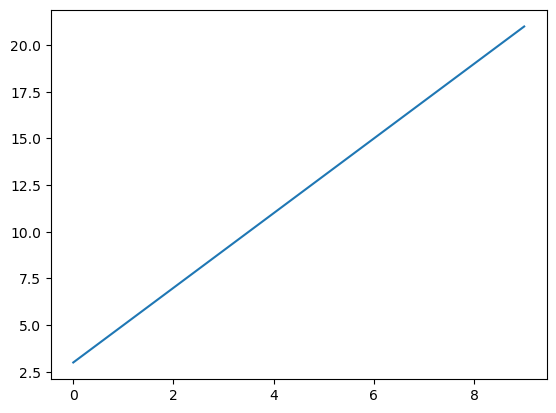

In [13]:
plt.plot(x, y)

<BarContainer object of 10 artists>

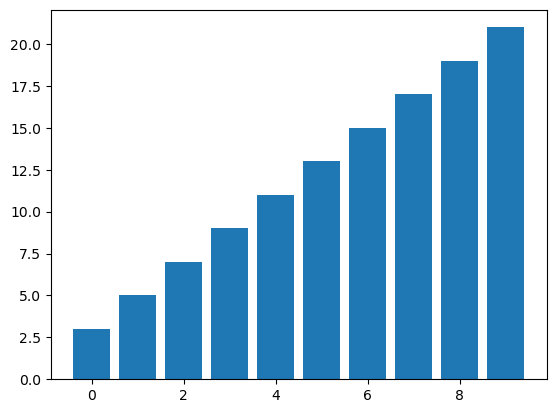

In [14]:
plt.bar(x, y)

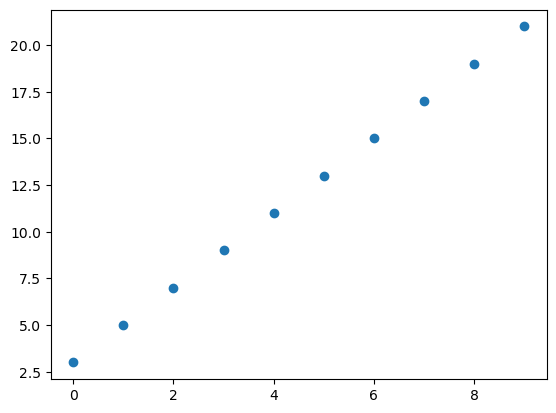

In [15]:
plt.scatter(x, y)

It is possible to plot multiple plots on the same graph.

Matplotlib supports labels and legends too and it is possible to specify math formulae using `$...$` notation.

In [16]:
x = np.arange(-10, 11)
y1 = 5*x+30
y2 = 5*x-30
y3 = x*x

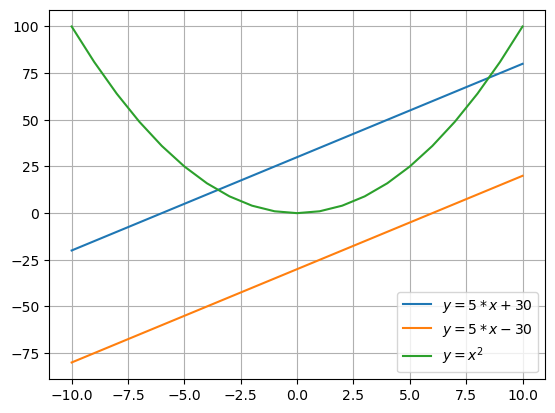

In [17]:
plt.plot(x, y1, label="$y = 5*x+30$")
plt.plot(x, y2, label="$y = 5*x-30$")
plt.plot(x, y3, label="$y = x^2$")
plt.grid()
plt.legend(loc="lower right")

We can set the labels and titles of a plot.

Text(0.5, 1.0, 'Graph')

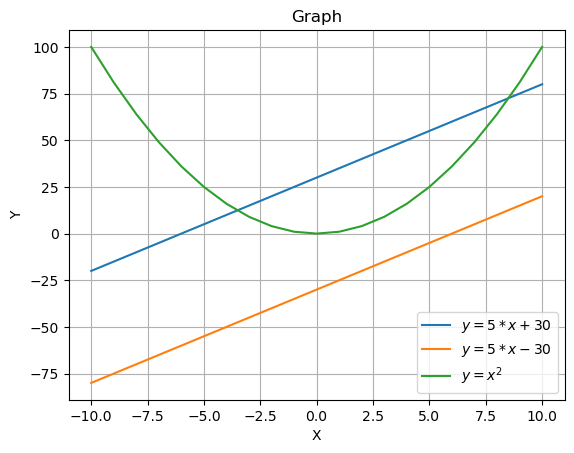

In [18]:
fig = plt.figure()

plt.plot(x, y1, label="$y = 5*x+30$")
plt.plot(x, y2, label="$y = 5*x-30$")
plt.plot(x, y3, label="$y = x^2$")
plt.grid()
plt.legend(loc="lower right")

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Graph")

Let's do plot some trignometric functions.

In [19]:
x = np.arange(-2*np.pi, 2*np.pi, 0.1)
y1 = np.sin(x)
y2 = np.cos(x)

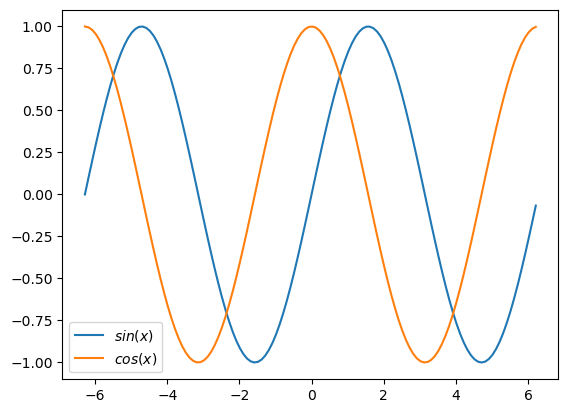

In [20]:
plt.plot(x, y1, label="$sin(x)$")
plt.plot(x, y2, label="$cos(x)$")
plt.legend()

**Problem:** Plot a graph of $y = sin(x)$ and $y = sin^2(x)$ from $-2\pi$ to $2\pi$.

Note: $sin^2(x)$ is $sin(x) * sin(x)$

### With Pandas

Pandas provides an easy way to plot the data using matplotlib.

Usage:

```
df.plot(kind=.., x=.., y=..)
```

or

```
df.plot.line
df.plot.bar
df.plot.scatter
df.plot.hist
```

In [ ]:
df = pd.read_csv("data/un-min.csv")

In [ ]:
df.head()

Text(0.5, 1.0, 'GDP vs Infant Motality')

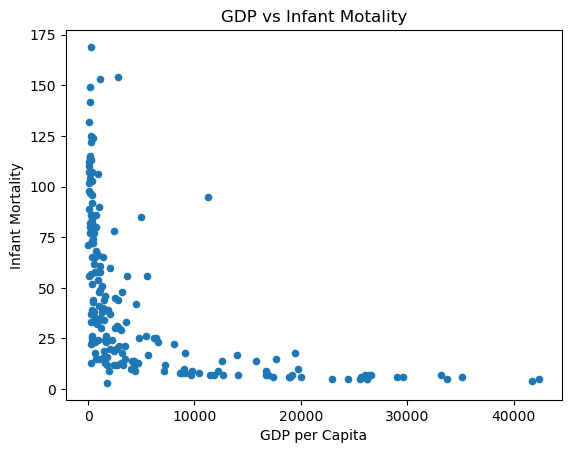

In [22]:
# df.plot(kind="scatter", x="GDPperCapita", y="infantMortality")
df.plot.scatter(x="GDPperCapita", y="infantMortality")

plt.xlabel("GDP per Capita")
plt.ylabel("Infant Mortality")
plt.title("GDP vs Infant Motality")

Text(0.5, 1.0, 'GDP vs Infant Motality')

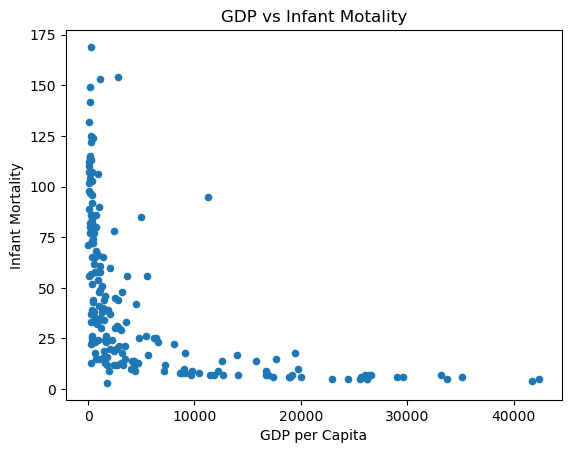

In [23]:
ax = df.plot.scatter(x="GDPperCapita", y="infantMortality")
ax.set_xlabel("GDP per Capita")
ax.set_ylabel("Infant Mortality")
ax.set_title("GDP vs Infant Motality")

<Axes: xlabel='country'>

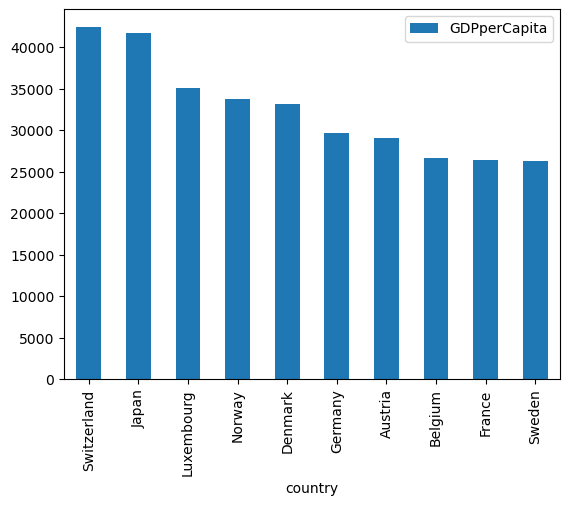

In [24]:
(df
 .set_index("country")
 .sort_values("GDPperCapita", ascending=False)
 .head(10)
 .plot.bar(y="GDPperCapita"))

**Problem:** Plot `gdpPercap` per year for India and China in the same graph.

### Subplots

In [26]:
x = np.arange(-10, 11)
y1 = x*2
y2 = x**2

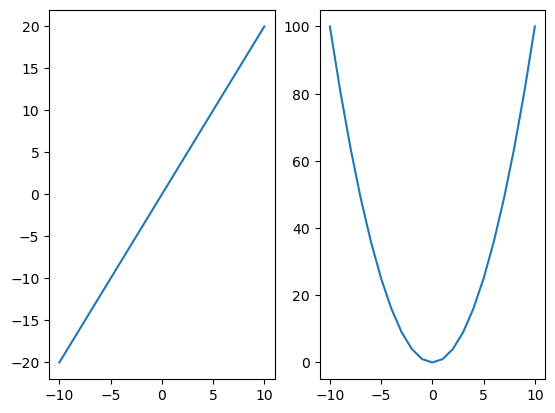

In [27]:
fig, axs = plt.subplots(1, 2)

axs[0].plot(x, y1)
axs[1].plot(x, y2)

We can tell matplotlib to shape the same y axis.

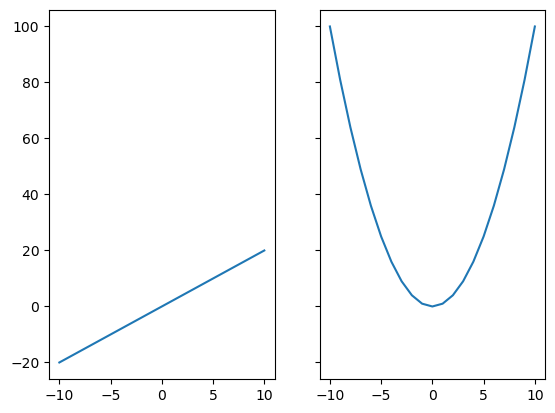

In [28]:
fig, axs = plt.subplots(1, 2, sharey=True)
axs[0].plot(x, y1)
axs[1].plot(x, y2)


Same thing as two subplots in a column.

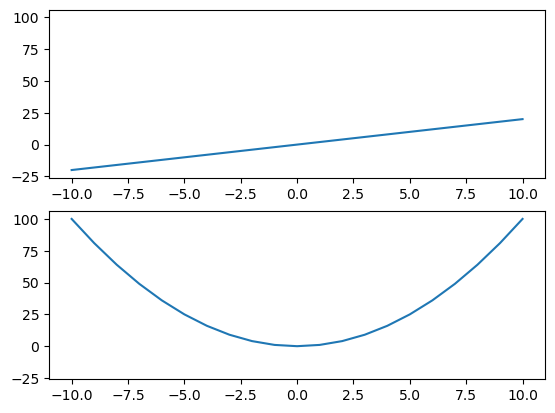

In [29]:
fix, axs = plt.subplots(2, 1, sharey=True)
axs[0].plot(x, y1)
axs[1].plot(x, y2)


We can also have a grid of plots.

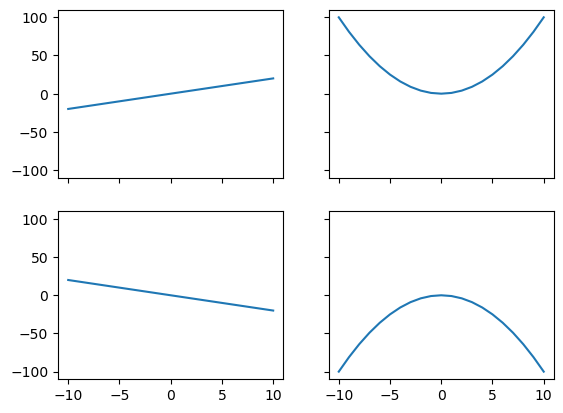

In [30]:
fix, axs = plt.subplots(2, 2, sharex=True, sharey=True)

axs[0, 0].plot(x, y1)
axs[0, 1].plot(x, y2)

axs[1, 0].plot(x, -y1)
axs[1, 1].plot(x, -y2)


### Subplots with Pandas

In [31]:
df.head()

country   region  lifeMale  lifeFemale  infantMortality  GDPperCapita
0  Afghanistan     Asia      45.0        46.0              154          2848
1      Albania   Europe      68.0        74.0               32           863
2      Algeria   Africa      67.5        70.3               44          1531
3       Angola   Africa      44.9        48.1              124           355
4    Argentina  America      69.6        76.8               22          8055

<Axes: xlabel='GDPperCapita', ylabel='infantMortality'>

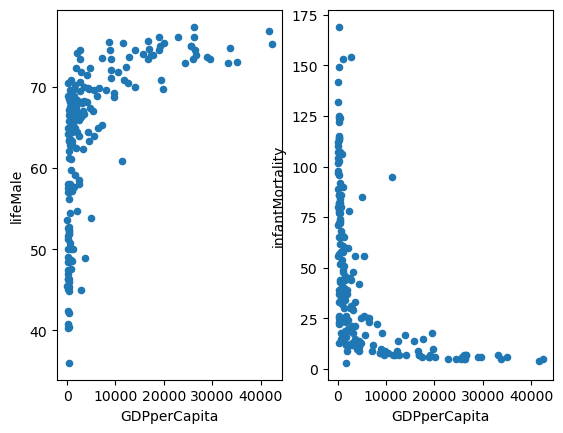

In [32]:
fig, axs = plt.subplots(1, 2)
df.plot.scatter(x="GDPperCapita", y="lifeMale", ax=axs[0])
df.plot.scatter(x="GDPperCapita", y="infantMortality", ax=axs[1])


We can call `fig.tight_layout()` to adjust the padding between the sub plots after they are drawn.

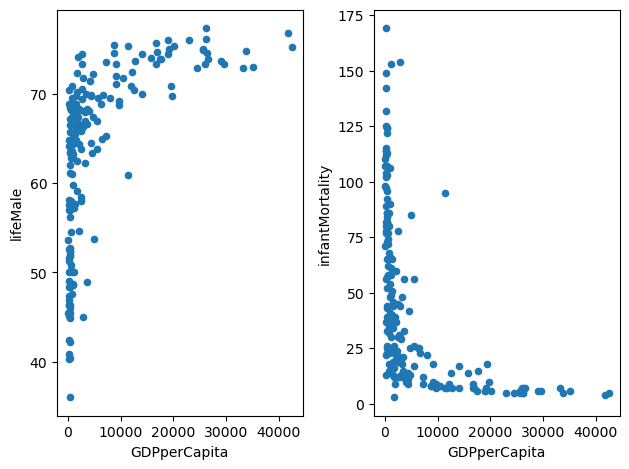

In [33]:
fig, axs = plt.subplots(1, 2)
df.plot.scatter(x="GDPperCapita", y="lifeMale", ax=axs[0])
df.plot.scatter(x="GDPperCapita", y="infantMortality", ax=axs[1])

# Adjust padding between subplots
fig.tight_layout()


We can even add a title to figure.

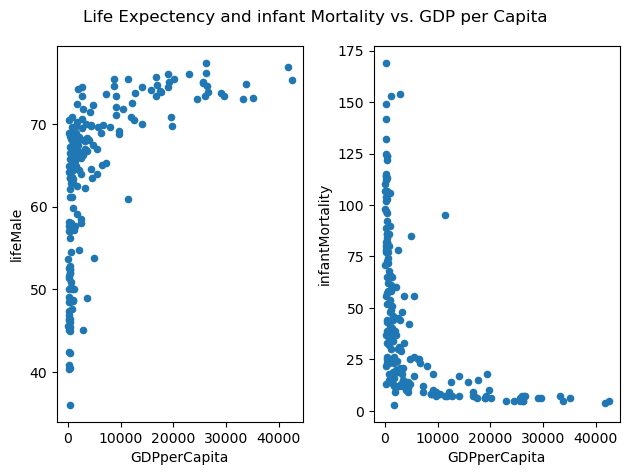

In [36]:
fig, axs = plt.subplots(1, 2)
df.plot.scatter(x="GDPperCapita", y="lifeMale", ax=axs[0])
df.plot.scatter(x="GDPperCapita", y="infantMortality", ax=axs[1])

fig.suptitle("Life Expectency and infant Mortality vs. GDP per Capita")

# Adjust padding between subplots
fig.tight_layout()

We can use the subplots even to plot multiple graphs in a single plot.

Text(0.5, 1.0, 'Population')

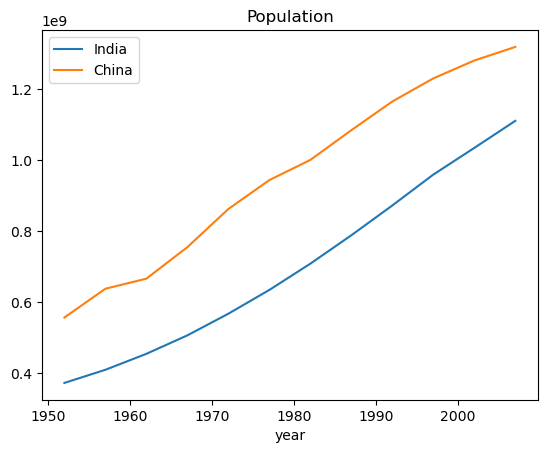

In [37]:
fig, ax = plt.subplots()
df_gap[df_gap.country == "India"].plot.line(x="year", y="pop", label="India", ax=ax)
df_gap[df_gap.country == "China"].plot.line(x="year", y="pop", label="China", ax=ax)
plt.title("Population")

**Problem:** Plot `gdpPercap` vs. `year` from the gapminder dataset for India and China in the same plot.

**Problem:** Plot `pop`, `gdpPercap` and `lifeExp` against `year` from the gapminder dataset for India and China as a row of three plots.

## Seaborn

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

Seaborn has three categories of charts - *relplot* (relational), *displot* (distributions) and *catplot* (categories).

![Searborn organization](images/seaborn-organization.png)
    
From [Seaborn Tutorial](https://seaborn.pydata.org/tutorial/function_overview.html).

### Palmer Penguins

![Palmer Penguins](images/lter_penguins.png)

In this section, we'll use [Palmer Penguins dataset](https://github.com/allisonhorst/palmerpenguins), which is comes packaged with seaborn.

The dataset includes measurements for penguin species, island in Palmer Archipelago, size (flipper length, body mass, bill dimensions), and sex. 

In [38]:
import pandas as pd
import seaborn as sns

In [39]:
df_penguins = sns.load_dataset("penguins")

In [40]:
df_penguins.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

In [41]:
df_penguins.shape

(344, 7)

While seaborn can ignore missing values when plotting, it may be good idea in general to clean the data to remove missing values before starting any exploration.

In [42]:
# number of missing values in each column
df_penguins.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [43]:
# drop the rows with missing value
df_penguins.dropna(inplace=True)

In [44]:
# number of rows and columns in the data after dropping rows with missing values
df_penguins.shape

(333, 7)

### Scatterplot

In [45]:
df_penguins.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
4       3450.0  Female  
5       3650.0    Male

The scatter plot allows visualizing two dimentions. More dimentions can be added a scatter plot to control color, size and style.

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

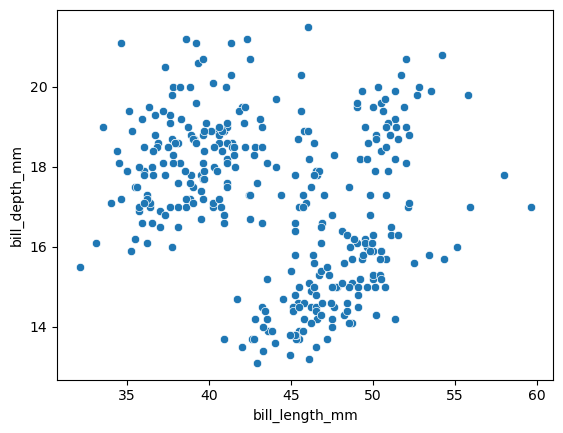

In [46]:
# scatterplot of bill length vs bill depth
sns.scatterplot(df_penguins, x="bill_length_mm", y="bill_depth_mm")

The *scatterplot* is a special kind of *relplot*. We can get the same output using the following ways as well.

When we specify both `x` and `y` arguments to 
```
sns.relplot(df_penguins, x="bill_length_mm", y="bill_depth_mm")
```

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

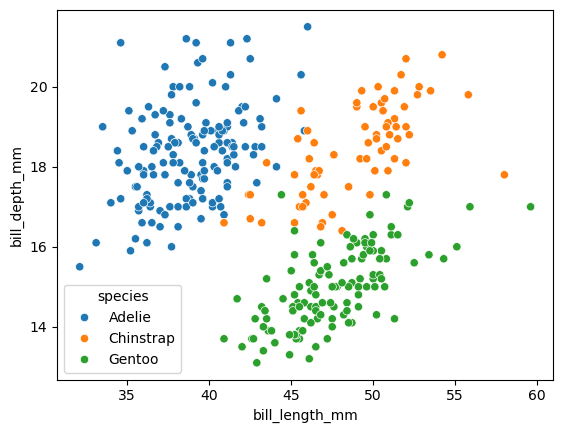

In [47]:
# scatterplot of bill length vs bill depth 
# with color by the species
sns.scatterplot(df_penguins, x="bill_length_mm", y="bill_depth_mm", hue="species")

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

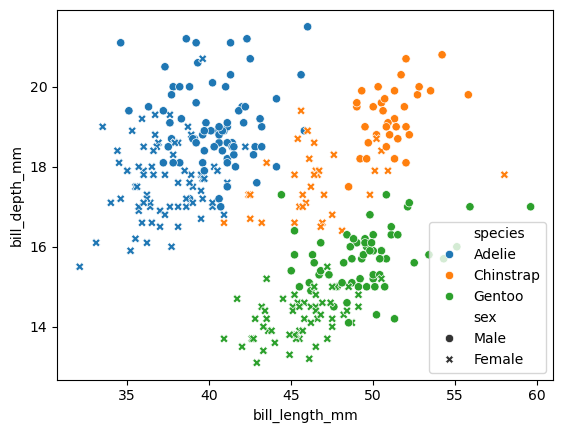

In [48]:
# scatterplot of bill length vs bill depth 
# with color by the species and style by sex
sns.scatterplot(df_penguins, 
                x="bill_length_mm", y="bill_depth_mm", 
                hue="species", 
                style="sex")

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

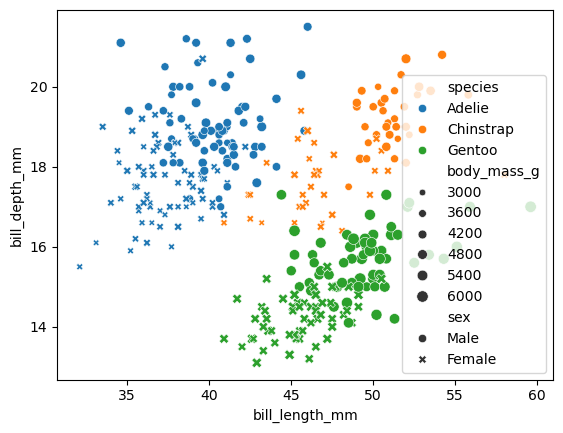

In [49]:
# scatterplot of bill length vs bill depth 
# with color by the species, style by sex and size by body weight
sns.scatterplot(df_penguins, 
                x="bill_length_mm", y="bill_depth_mm", 
                hue="species", style="sex", 
                size="body_mass_g")

Seaborn allows drawing lines on the graphs using matplotlib primitives.

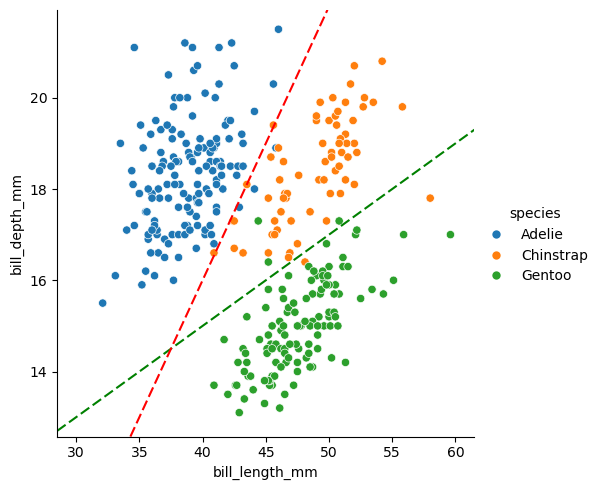

In [50]:
g = sns.relplot(data=df_penguins, x="bill_length_mm", y="bill_depth_mm", hue='species')
g.ax.axline(xy1=(30, 13), xy2=(60, 19), color="g", dashes=(5, 2))
g.ax.axline(xy1=(35, 13), slope=.6, color="r", dashes=(5, 2))

### Picking different colors

In [51]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [52]:
sns.color_palette('deep')

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

In [53]:
sns.color_palette('colorblind')

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

In [54]:
sns.color_palette('bright')

[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.10196078431372549, 0.788235294117647, 0.2196078431372549),
 (0.9098039215686274, 0.0, 0.043137254901960784),
 (0.5450980392156862, 0.16862745098039217, 0.8862745098039215),
 (0.6235294117647059, 0.2823529411764706, 0.0),
 (0.9450980392156862, 0.2980392156862745, 0.7568627450980392),
 (0.6392156862745098, 0.6392156862745098, 0.6392156862745098),
 (1.0, 0.7686274509803922, 0.0),
 (0.0, 0.8431372549019608, 1.0)]

In [55]:
sns.color_palette('dark')

[(0.0, 0.10980392156862745, 0.4980392156862745),
 (0.6941176470588235, 0.25098039215686274, 0.050980392156862744),
 (0.07058823529411765, 0.44313725490196076, 0.10980392156862745),
 (0.5490196078431373, 0.03137254901960784, 0.0),
 (0.34901960784313724, 0.11764705882352941, 0.44313725490196076),
 (0.34901960784313724, 0.1843137254901961, 0.050980392156862744),
 (0.6352941176470588, 0.20784313725490197, 0.5098039215686274),
 (0.23529411764705882, 0.23529411764705882, 0.23529411764705882),
 (0.7215686274509804, 0.5215686274509804, 0.0392156862745098),
 (0.0, 0.38823529411764707, 0.4549019607843137)]

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

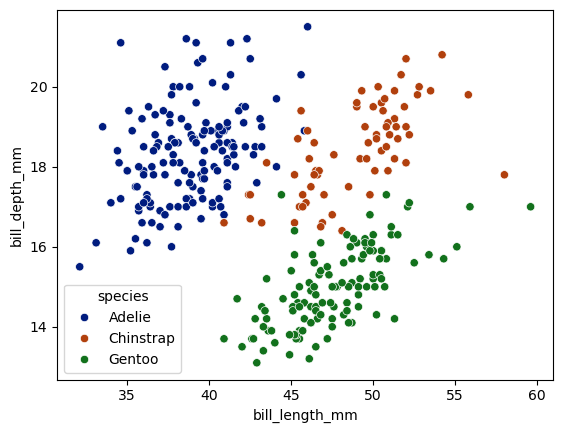

In [56]:
sns.scatterplot(df_penguins, 
                x="bill_length_mm", y="bill_depth_mm", 
                hue="species",
                palette="dark")

<Axes: xlabel='year', ylabel='pop'>

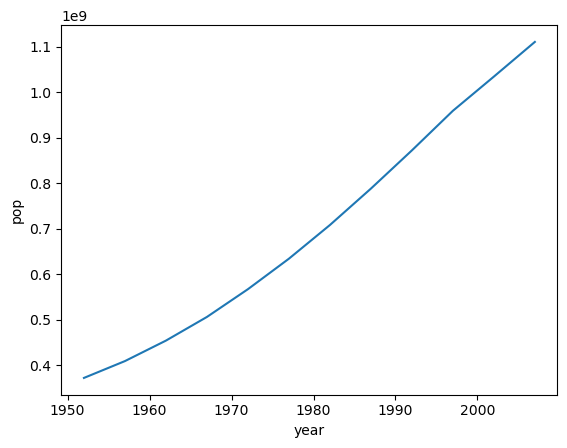

In [57]:
df1 = df_gap[df_gap.country=='India']
sns.lineplot(df1, x="year", y="pop")

<Axes: xlabel='year', ylabel='pop'>

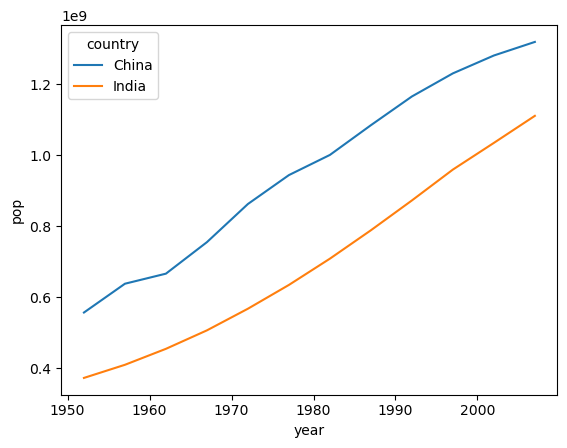

In [58]:
countries = ['India', 'China']
df1 = df_gap[df_gap.country.isin(countries)]
sns.lineplot(df1, x="year", y="pop", hue="country")

**Problem:** Plot a scatterplot of GDP per capita vs. infant Mortality and color by region using the UN dataset.

**Problem:** Plot a lineplot of `GDPpercap` vs year from the gapminder dataset for `India` and `China`.

### Distributions

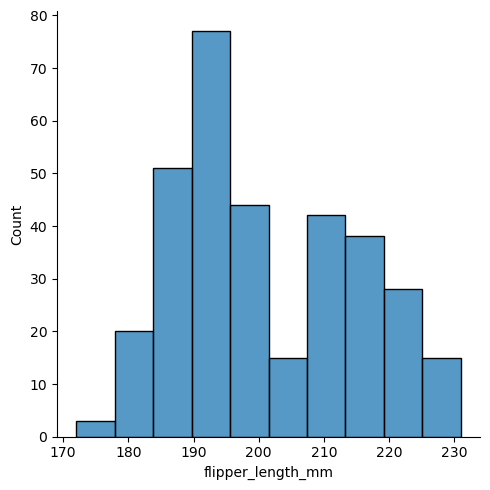

In [60]:
sns.displot(df_penguins, x="flipper_length_mm", kind="hist")

# sns.histplot(df, x="flipper_length_mm")

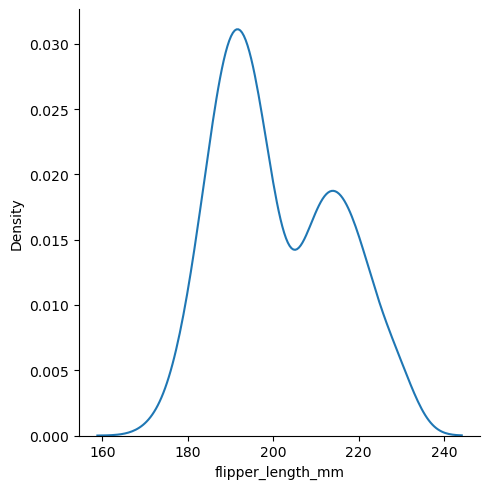

In [61]:
sns.displot(df_penguins, x="flipper_length_mm", kind="kde")

# sns.kdetplot(df, x="flipper_length_mm")

The distplots allow grouping by color.

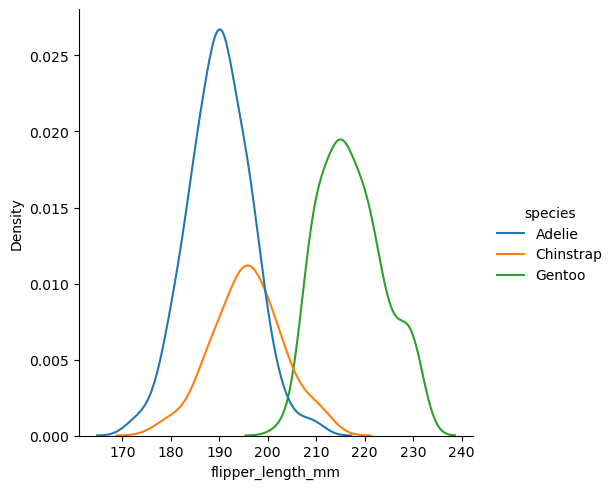

In [62]:
sns.displot(df_penguins, x="flipper_length_mm", kind="kde", hue="species")

We can stack multiple distributions on top of each other.

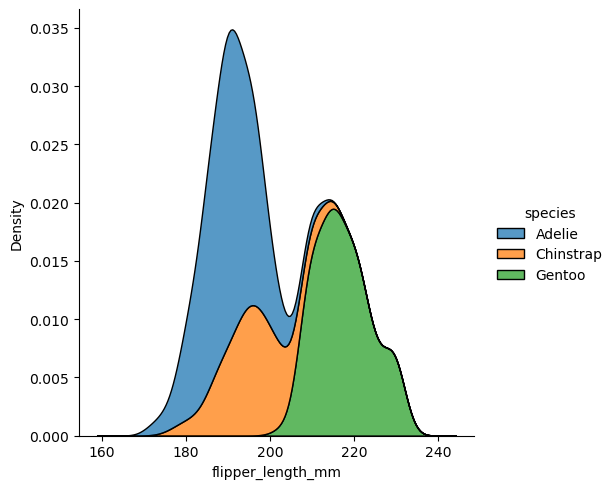

In [63]:
sns.displot(df_penguins, x="flipper_length_mm", kind="kde", 
                hue="species", multiple="stack")

We could do the same with histograms.

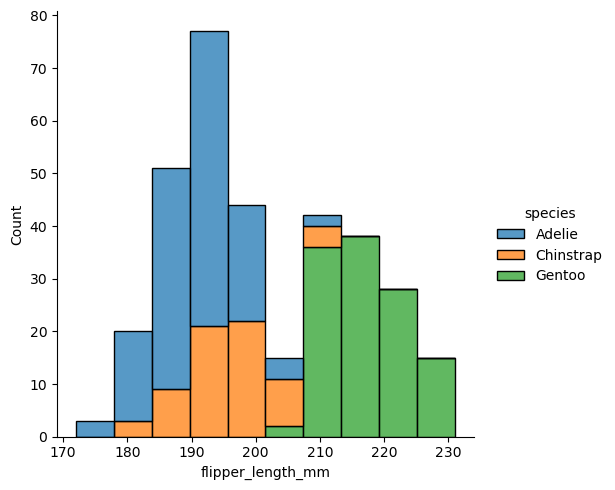

In [64]:
sns.displot(df_penguins, x="flipper_length_mm", kind="hist", 
            hue="species", multiple="stack")

**Problem:** Plot histogram of GDPperCapita from the UN dataset.

In [59]:
df.head()

country   region  lifeMale  lifeFemale  infantMortality  GDPperCapita
0  Afghanistan     Asia      45.0        46.0              154          2848
1      Albania   Europe      68.0        74.0               32           863
2      Algeria   Africa      67.5        70.3               44          1531
3       Angola   Africa      44.9        48.1              124           355
4    Argentina  America      69.6        76.8               22          8055

### Categorical plots

Catplots allows visualizaing categorical data. The default view is a scatter plot with a small jitter added to make the points visible. 

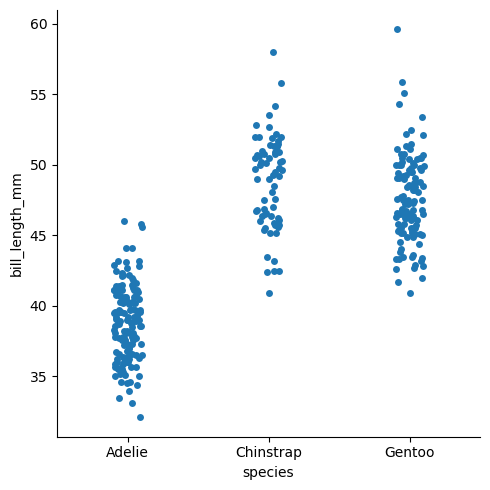

In [65]:
sns.catplot(df_penguins, x="species", y="bill_length_mm")

A slightly better looking version of that is a swarm plot.

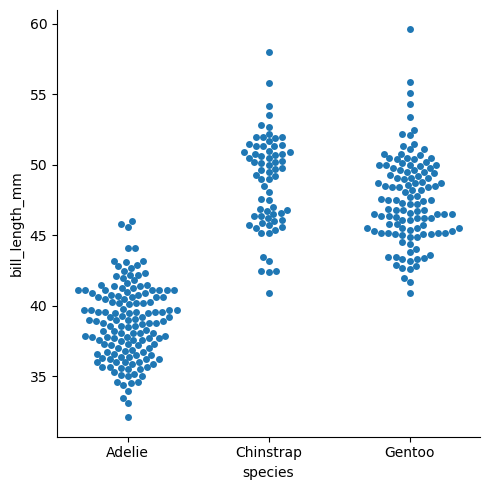

In [66]:
sns.catplot(df_penguins, x="species", y="bill_length_mm", kind="swarm")

we can add another dimension usng hue.

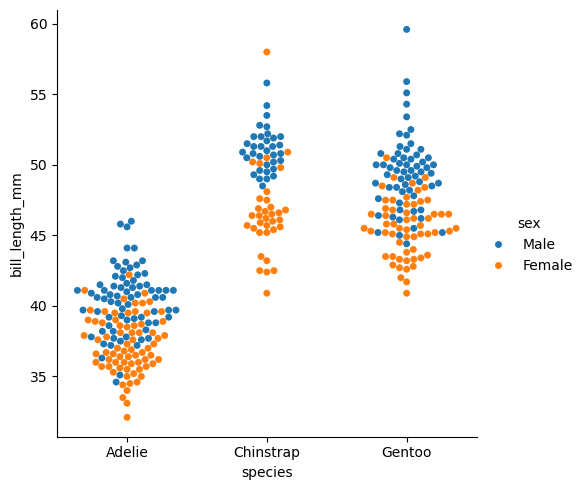

In [67]:
sns.catplot(df_penguins, x="species", y="bill_length_mm", 
            kind="swarm", hue="sex")

We could even flip the axes, if we want.

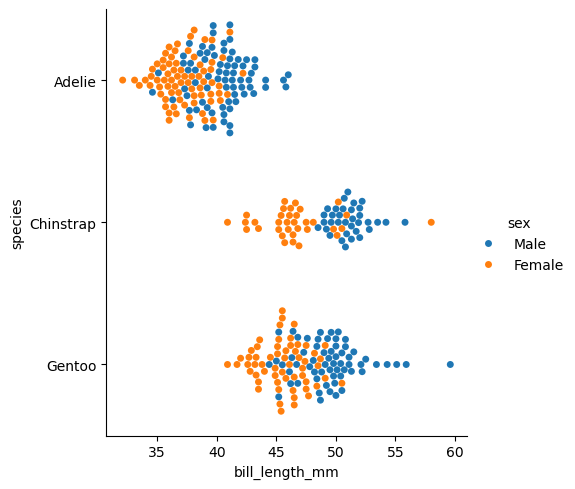

In [68]:
sns.catplot(df_penguins, x="bill_length_mm", y="species", 
            kind="swarm", hue="sex")

**Problem:** Create a swarm plot of GDPperCapita by region on the UN dataset.

You may want to pass `size=4` and `aspect=3` to make the plot a bit bigger to accomodate more points.

Can we try ploting density?

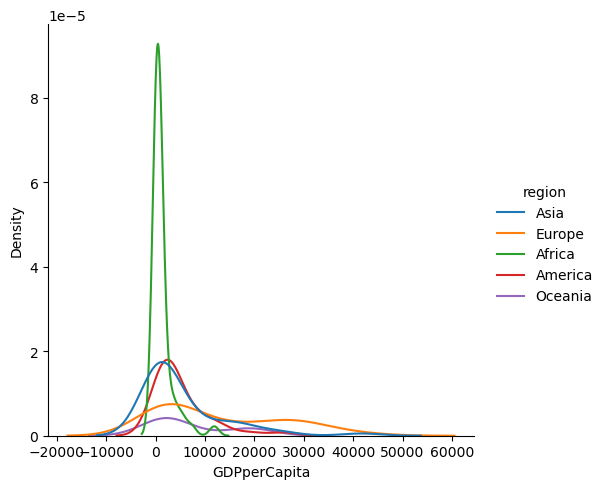

In [70]:
sns.displot(df, kind="kde", x="GDPperCapita", hue="region")

## Comparing Distributions

The *boxplot* and *voilinplot*, kinds of catplots, allows comparing distributions.

<Axes: ylabel='bill_length_mm'>

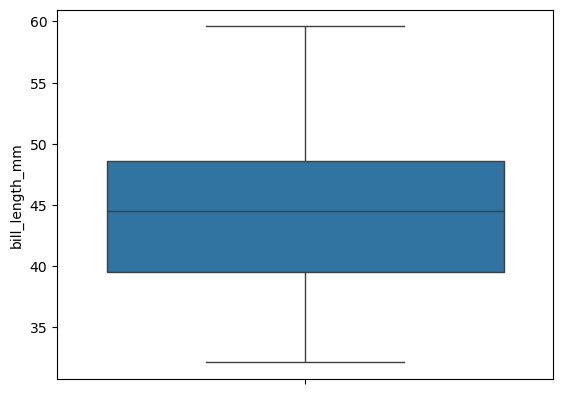

In [72]:
sns.boxplot(df_penguins, y='bill_length_mm')

<Axes: ylabel='bill_length_mm'>

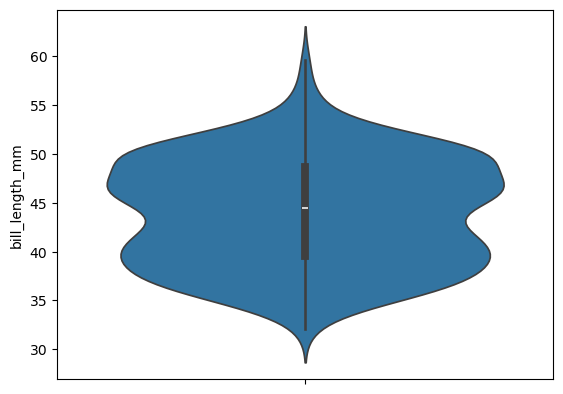

In [74]:
sns.violinplot(df_penguins, y='bill_length_mm')

Both these plots allow splitting the distribution by a categorical column.

<Axes: xlabel='species', ylabel='bill_length_mm'>

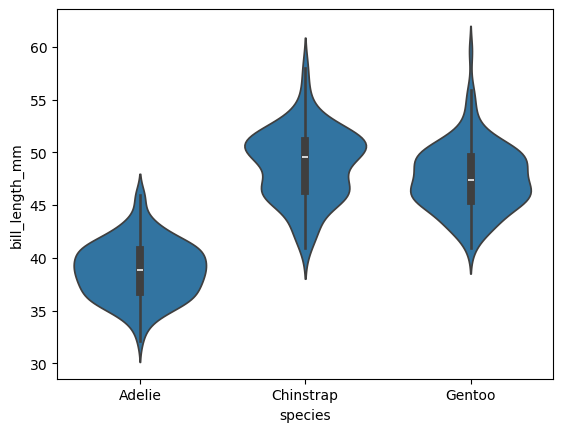

In [79]:
sns.violinplot(df_penguins, y='bill_length_mm', x="species")

We could add another dimension using hue.

<Axes: xlabel='species', ylabel='bill_length_mm'>

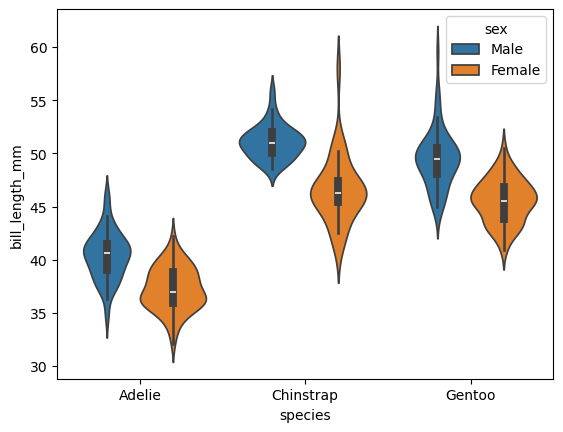

In [80]:
sns.violinplot(df_penguins, y='bill_length_mm', x="species", hue="sex")

We could use the space better by splitting the violin when there are only two categories.

<Axes: xlabel='species', ylabel='bill_length_mm'>

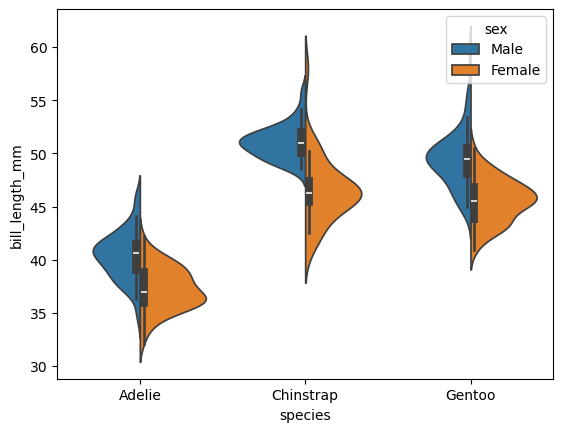

In [82]:
sns.violinplot(df_penguins, y='bill_length_mm', x="species", hue="sex", split=True)

**Problem:** Plot Voilin plot of GDPperCapita by region on the UN dataset.

### Combining multiple views on the data

The `jointplot` and `pairplot` plots both relationships and distubutions in a single graph. 

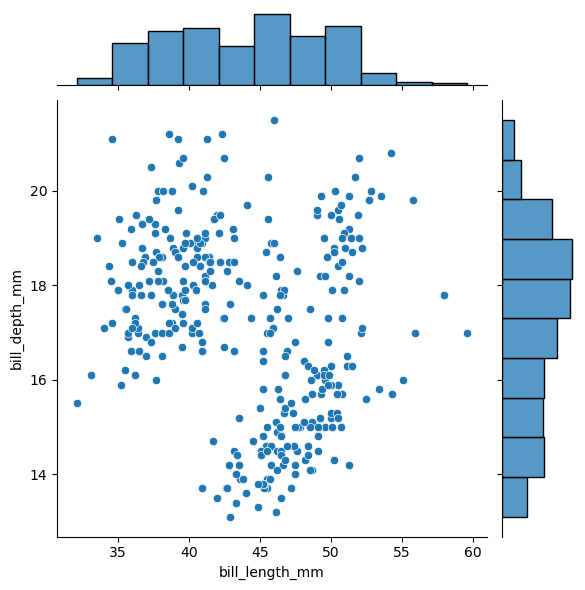

In [83]:
sns.jointplot(df_penguins, x="bill_length_mm", y="bill_depth_mm")

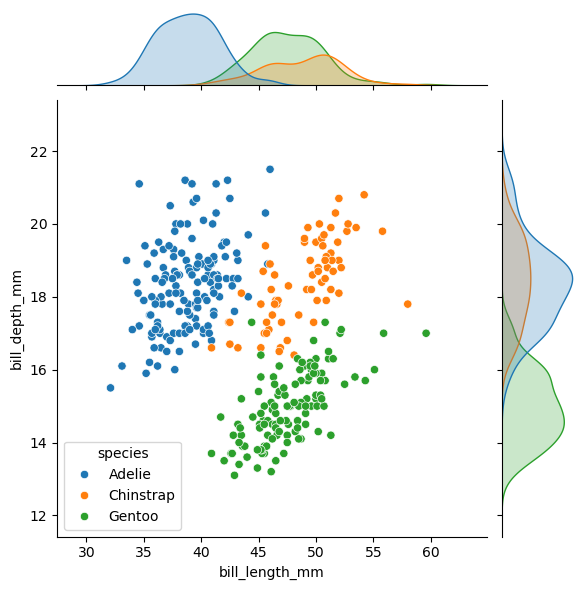

In [84]:
sns.jointplot(df_penguins, x="bill_length_mm", y="bill_depth_mm", hue="species")

The pairplot show relations between all the numerical columns in a single grid.

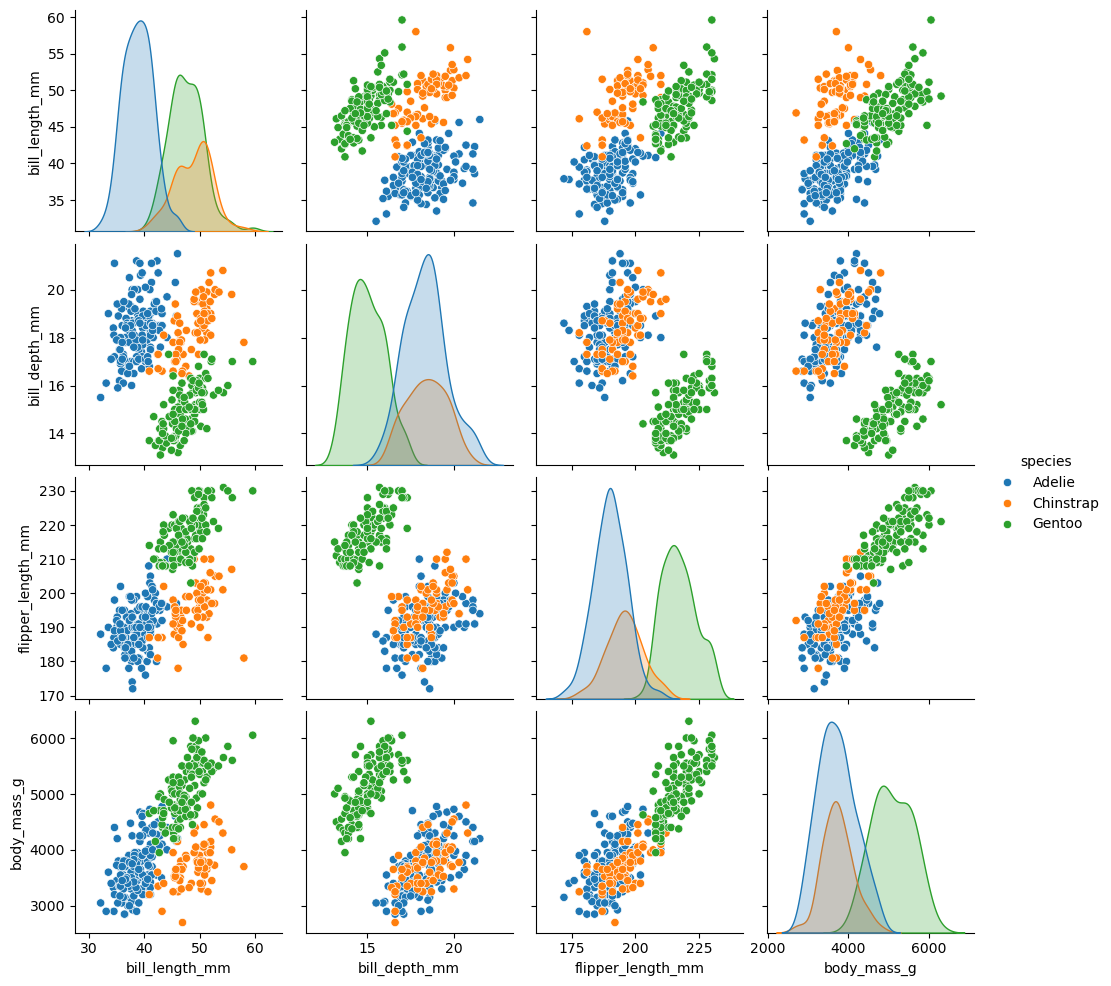

In [85]:
sns.pairplot(data=df_penguins, hue="species")

**Problem:** Plot a pair plot of all numeric columns in the UN dataset.

**Problem:** Try adding hue by region and see how the pair plot changes.

### Showing multiple charts

Seaborn allows showing a grip of charts for displaying more information. Passing `height=3` to limit the chart size.

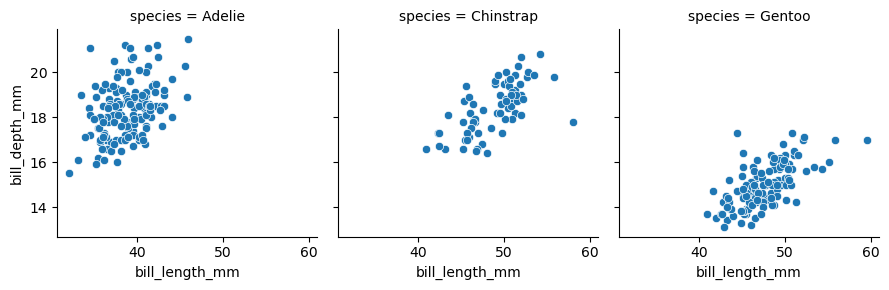

In [86]:
sns.relplot(df_penguins, x="bill_length_mm", y="bill_depth_mm", 
            col="species", height=3)

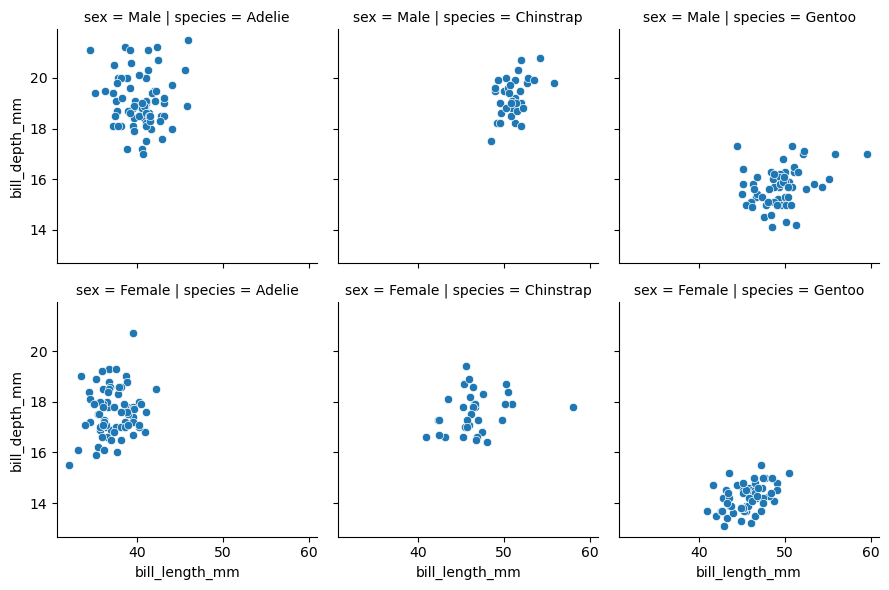

In [87]:
sns.relplot(df_penguins, x="bill_length_mm", y="bill_depth_mm", 
            col="species", row="sex", 
            height=3)

When there are too many categories, we can even specify `col_wrap`.

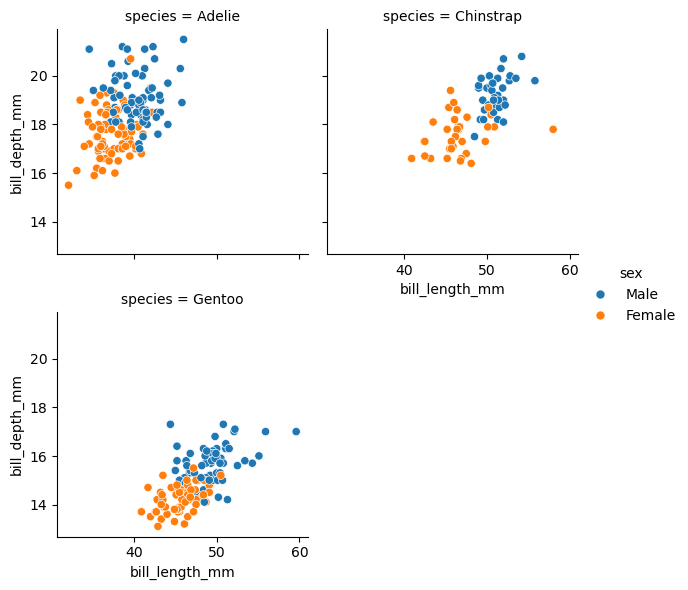

In [88]:
sns.relplot(df_penguins, x="bill_length_mm", y="bill_depth_mm", 
            hue="sex", col="species", 
            col_wrap=2, height=3)

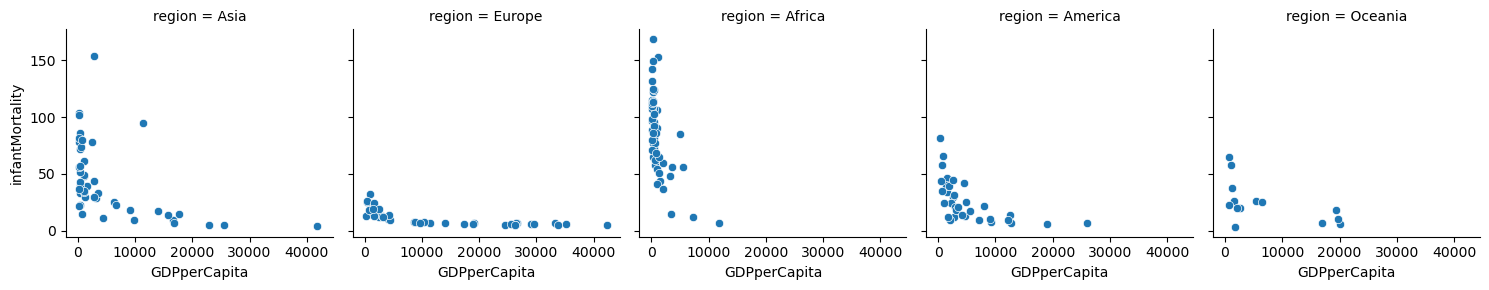

In [89]:
sns.relplot(df, x="GDPperCapita", y="infantMortality",
           col="region", height=3)

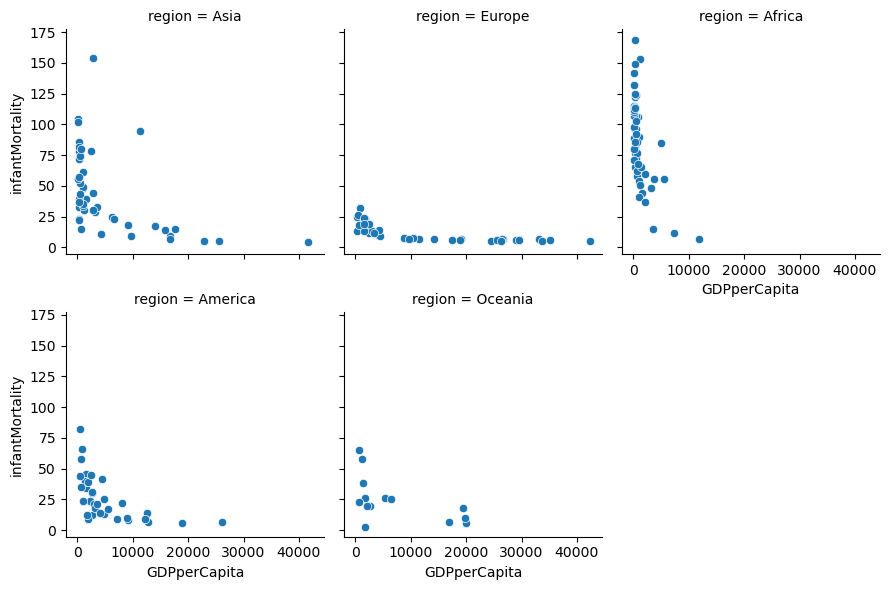

In [90]:
sns.relplot(df, x="GDPperCapita", y="infantMortality",
           col="region", height=3, col_wrap=3)

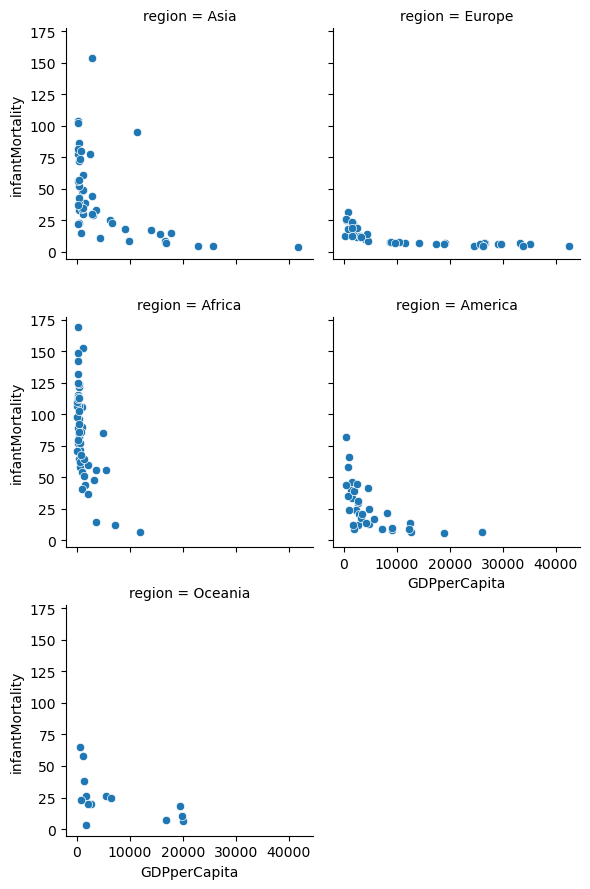

In [91]:
sns.relplot(df, x="GDPperCapita", y="infantMortality",
           col="region", height=3, col_wrap=2)

## Explorting Images

<Figure size 600x600 with 0 Axes>

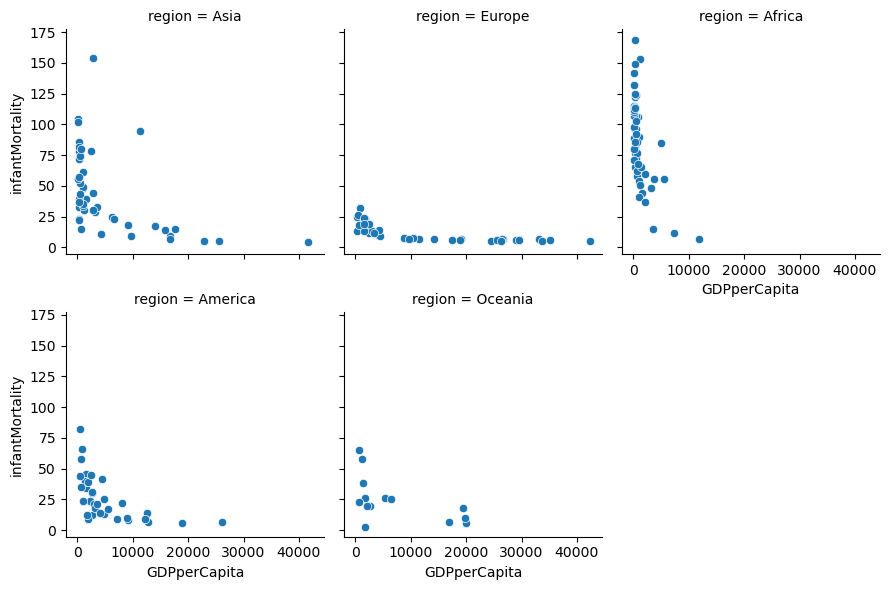

In [95]:
import matplotlib.pyplot as plt 

plt.figure(figsize=[6, 6])
sns.relplot(df, x="GDPperCapita", y="infantMortality",
           col="region", height=3, col_wrap=3)
# plt.savefig("un.svg")
plt.savefig("un.png")

In [93]:
!ls -l un.svg

-rw-r--r-- 1 jupyter-anand jupyter-anand 73362 Nov 23 05:49 un.svg


## Plotly

Plotly is an interactive visualization library.

In [96]:
import plotly.express as px

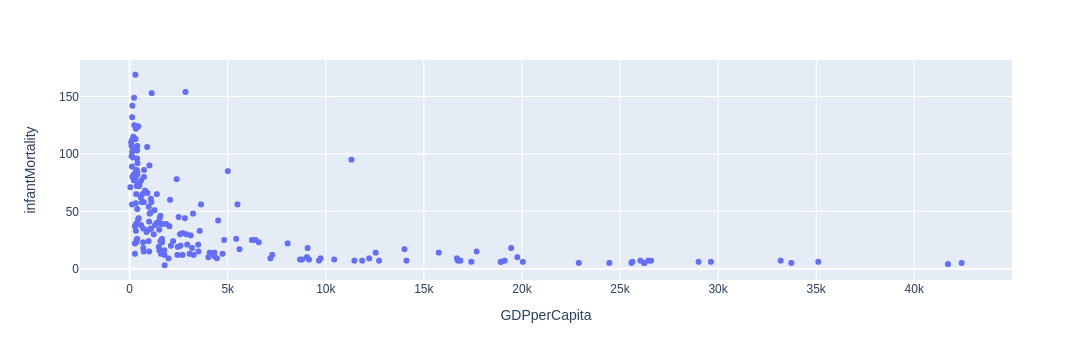

In [97]:
px.scatter(df, x="GDPperCapita", y="infantMortality")

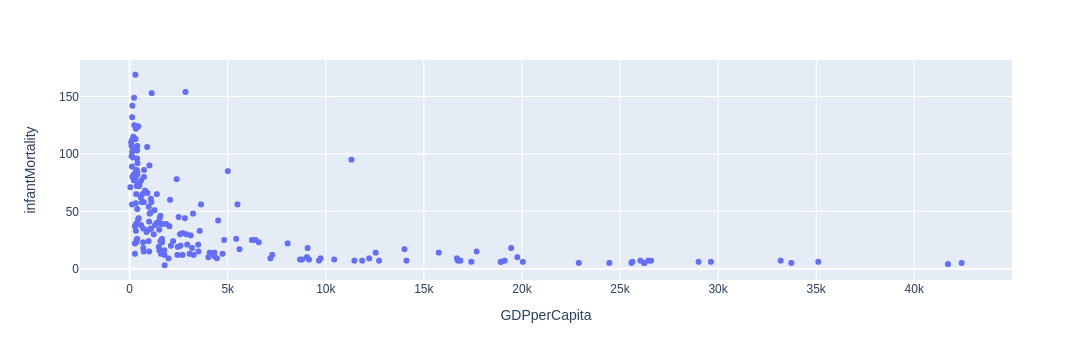

In [98]:
px.scatter(df, x="GDPperCapita", y="infantMortality", hover_data=["country", "GDPperCapita", "infantMortality"])

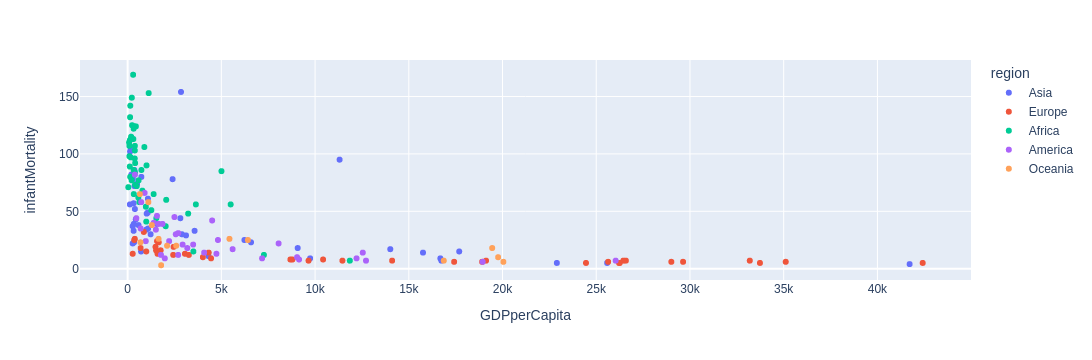

In [99]:
px.scatter(df, x="GDPperCapita", y="infantMortality", color="region")

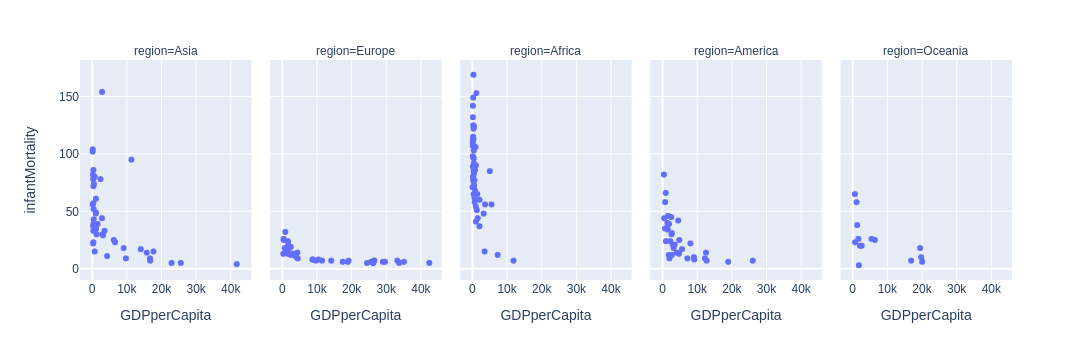

In [100]:
px.scatter(df, x="GDPperCapita", y="infantMortality", facet_col='region')

And a line hraph.

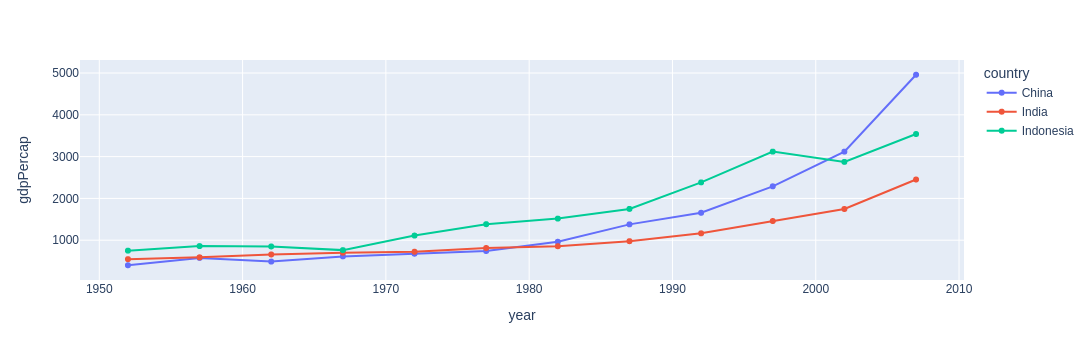

In [101]:
countries = ["India", "China", "Indonesia"]
df1 = df_gap[df_gap.country.isin(countries)]
fig = px.line(df1, x="year", y="gdpPercap", color="country")
fig.update_traces(mode="markers+lines", hovertemplate=None)
fig.update_layout(hovermode="x")

Plotly even allows animations over a column.

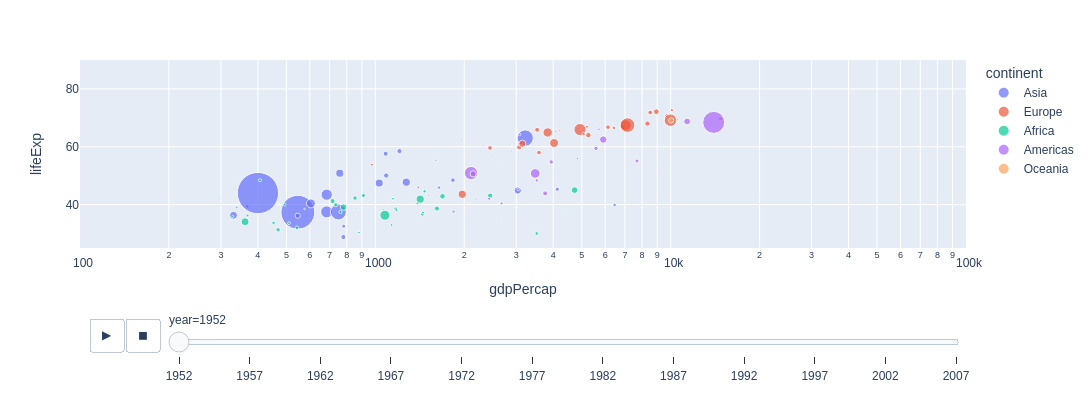

In [104]:
fig = px.scatter(df_gap, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=45, range_x=[100,100000], range_y=[25,90], height=400)
fig.show()


Or even split by continent.

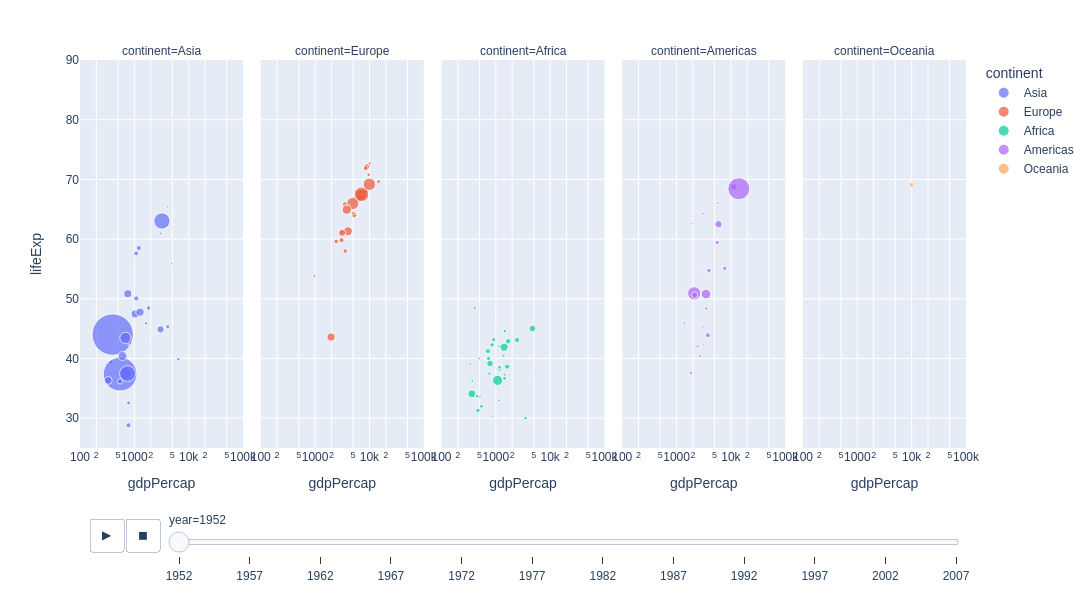

In [105]:
fig = px.scatter(df_gap, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country", facet_col="continent",
           log_x=True, size_max=45, range_x=[100,100000], range_y=[25,90], height=600)
fig.show()
